In [1]:
import sys
import pathlib
pth=str(pathlib.Path().absolute())
sys.path.append(('\\').join(pth.split('\\')[:-1])+"\\Utils")
from Utilities import *
import numpy as np
import skimage
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.transform import rotate
from skimage import morphology
import networkx as nx
import json

In [2]:
f1=open(('\\').join(pth.split('\\')[:-2])+"\\Data_base\\validcrop.txt","r")
lines=f1.readlines()
linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn=linesn.reshape(-1,3)
#print(linesn[103:])
#linesn=linesn[103:]

linesnc=v_replace_err(linesn)
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
xywh=v_no_spaces(xywh)
xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
xywh=xywh.reshape(-1,4).astype(int)+1

dir_origin=('\\').join(pth.split('\\')[:-2])+'\\Data_base\\Imagenes_originales\\'
dir_ROI=('\\').join(pth.split('\\')[:-2])+'\\Data_base\\Sem_Auto\\eye_'
dir_meta=('\\').join(pth.split('\\')[:-2])+'\\Data_base\\Metadata_V7G_sckit\\'

In [3]:
name=imgnames[0]
img = io.imread(dir_origin+name)
ROI = io.imread(dir_ROI+name)
mask=assemble_mask(xywh[np.where(imgnames==(name))][0],img,ROI)

In [4]:
labi=color.rgb2lab(img)
print(np.min(labi,axis=(0,1)))
print(np.max(labi,axis=(0,1)))

[  0.         -46.06393547 -44.46950719]
[100.          64.31363285  29.62698269]


In [5]:
D,slic=get_Normalized_Statistical_Descriptors_(img,mask,20,0)

In [6]:
Do,slico=get_Statistical_Descriptors_(img,mask,20,0)

In [7]:
D

{0: {'rgb_mean': array([0.58117125, 0.47707602, 0.43219674]),
  'rgb_std': array([0.19476109, 0.18715772, 0.18036057]),
  'rgb_per': array([0.]),
  'rgb_mo': array([0., 0., 0.]),
  'lab_mean': array([0.52634912, 0.5342433 , 0.54022809]),
  'lab_std': array([0.19499436, 0.02276415, 0.02505445]),
  'lab_per': array([0.]),
  'lab_mo': array([0., 0., 0.]),
  'hsv_mean': array([0.1188004 , 0.28325654, 0.5847886 ]),
  'hsv_std': array([0.20161376, 0.13148262, 0.19280546]),
  'hsv_per': array([0.]),
  'hsv_mo': array([0., 0., 0.]),
  'rgb_per0': array([0., 0., 0.]),
  'rgb_per25': array([0.52941176, 0.37254902, 0.31372549]),
  'rgb_per50': array([0.64705882, 0.52941176, 0.47058824]),
  'rgb_per75': array([0.71372549, 0.61568627, 0.56470588]),
  'rgb_per100': array([1., 1., 1.]),
  'hsv_per0': array([0., 0., 0.]),
  'hsv_per25': array([0.04263566, 0.2       , 0.5372549 ]),
  'hsv_per50': array([0.05932203, 0.27027027, 0.65098039]),
  'hsv_per75': array([0.07291667, 0.37226277, 0.71372549]),
  

In [8]:
Do

{0: {'rgb_mean': array([0.58117125, 0.47707602, 0.43219674]),
  'rgb_std': array([0.19476109, 0.18715772, 0.18036057]),
  'rgb_per': array([0.]),
  'rgb_mo': array([0., 0., 0.]),
  'lab_mean': array([52.63491165,  8.76628478, 10.29839017]),
  'lab_std': array([19.49943604,  5.82762326,  6.41394037]),
  'lab_per': array([0.]),
  'lab_mo': array([61.2,  5.1, 10.2]),
  'hsv_mean': array([0.1188004 , 0.28325654, 0.5847886 ]),
  'hsv_std': array([0.20161376, 0.13148262, 0.19280546]),
  'hsv_per': array([0.]),
  'hsv_mo': array([0., 0., 0.]),
  'rgb_per0': array([0., 0., 0.]),
  'rgb_per25': array([0.52941176, 0.37254902, 0.31372549]),
  'rgb_per50': array([0.64705882, 0.52941176, 0.47058824]),
  'rgb_per75': array([0.71372549, 0.61568627, 0.56470588]),
  'rgb_per100': array([1., 1., 1.]),
  'hsv_per0': array([0., 0., 0.]),
  'hsv_per25': array([0.04263566, 0.2       , 0.5372549 ]),
  'hsv_per50': array([0.05932203, 0.27027027, 0.65098039]),
  'hsv_per75': array([0.07291667, 0.37226277, 0.71

In [88]:
nLCH=(toLCh(img)+np.array([0,0,np.pi]))/np.array([100,(128*(2**0.5)),2*np.pi])

In [89]:
print(np.max(nLCH,axis=(0,1)))
print(np.min(nLCH,axis=(0,1)))

[1.         0.37223121 0.99992442]
[0.00000000e+00 0.00000000e+00 5.29013821e-05]


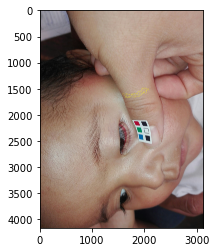

In [90]:
plt.imshow(mark_boundaries(img, slic, mode='inner',background_label=10))

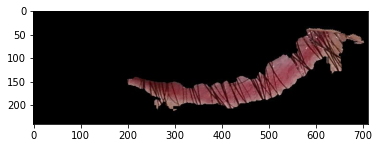

In [91]:
plt.imshow(ROI)

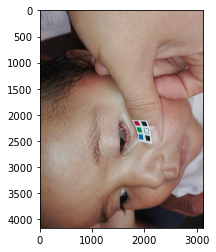

In [92]:
plt.imshow(img)

In [93]:
RID=np.unique(slic.flatten())
f=np.zeros((img.shape[0],img.shape[1],3+3+3+1))
f[:,:,0:3]=img[:,:,0:3]
f[:,:,3:6]=color.rgb2hsv(img)[:,:,0:3]
f[:,:,6:9]=color.rgb2lab(img)[:,:,0:3]
f[:,:,9]=slic

In [56]:
img=rotate(img,0)
img

array([[[0.36470588, 0.31372549, 0.27843137],
        [0.38431373, 0.33333333, 0.29803922],
        [0.39215686, 0.34117647, 0.30588235],
        ...,
        [0.1254902 , 0.14117647, 0.17647059],
        [0.12156863, 0.1372549 , 0.17254902],
        [0.11764706, 0.13333333, 0.16862745]],

       [[0.39607843, 0.34509804, 0.30980392],
        [0.39607843, 0.34509804, 0.30980392],
        [0.38431373, 0.33333333, 0.29803922],
        ...,
        [0.1254902 , 0.14117647, 0.17647059],
        [0.12156863, 0.1372549 , 0.17254902],
        [0.11372549, 0.12941176, 0.16470588]],

       [[0.36862745, 0.31764706, 0.28235294],
        [0.35294118, 0.30196078, 0.26666667],
        [0.3372549 , 0.28627451, 0.25098039],
        ...,
        [0.12156863, 0.1372549 , 0.17254902],
        [0.11372549, 0.12941176, 0.16470588],
        [0.10980392, 0.1254902 , 0.16078431]],

       ...,

       [[0.2745098 , 0.2627451 , 0.24313725],
        [0.27058824, 0.25882353, 0.23921569],
        [0.26666667, 0

In [69]:
srd=img[np.where(slic==1)[0],np.where(slic==1)[1],:]
x=np.mean(srd,axis=0)
print(x)
u=np.std(srd,axis=1)
print(u)

[29.12715902 25.62239428 23.49404407]
[2.1602469  2.1602469  2.1602469  ... 3.29983165 2.82842712 2.82842712]


In [72]:
srd.shape

(3358, 3)

In [105]:
get_SD_by_format(img,np.where(slic==1)[0],np.where(slic==1)[1],np.array([[0,1,2]]))

array([[191.4416315 , 162.29113924, 147.9254571 ],
       [  3.9154797 ,   3.52861204,   3.1582832 ],
       [180.        , 151.        , 139.        ],
       [189.        , 160.        , 146.        ],
       [191.        , 162.        , 147.        ],
       [194.        , 165.        , 150.        ],
       [203.        , 174.        , 160.        ],
       [188.7       , 158.1       , 142.8       ]])

In [114]:
def get_SD_by_format(f,ind1,ind2,j):
    srd=f[ind1,ind2,j.reshape(-1,1)]
    x=np.mean(srd,axis=1)
    u=np.std(srd,axis=1)
    perc=np.percentile(srd,np.array([0,25,50,75,100]),axis=1)
    #hist=np.vectorize(pyfunc=(lambda t:np.histogram(f[ind1,ind2,t],bins=50,range=(0,255))),signature='()->(j),(k)')(j)
    hist=np.vectorize(pyfunc=(lambda dt,t:np.histogram(dt[t,:],bins=50,range=(0,255))),signature='(a,b),()->(j),(k)')(srd,j)
    Mo=np.vectorize(pyfunc=(lambda x,y:y[np.where(x==np.max(x))[0][0]]),signature='(j),(k)->()')(hist[0],hist[1])
    return np.vstack((x,u,perc,Mo))

def get_NSD_by_format(f,ind1,ind2,j,fac=1):
    srd=f[ind1,ind2,j.reshape(-1,1)]
    x=np.mean(srd,axis=1)
    u=np.std(srd,axis=1)
    nsrd=(srd-x.reshape(-1,1))/u.reshape(-1,1)
    srd=srd.T[np.prod(u.reshape(-1,1)*fac>(np.abs(nsrd)),axis=0).astype("bool")]
    srd=srd.T
    x=np.mean(srd,axis=1)
    u=np.std(srd,axis=1)
    perc=np.percentile(srd,np.array([0,25,50,75,100]),axis=1)
    hist=np.vectorize(pyfunc=(lambda dt,t:np.histogram(dt[t,:],bins=50,range=(0,255))),signature='(a,b),()->(j),(k)')(srd,j)
    Mo=np.vectorize(pyfunc=(lambda x,y:y[np.where(x==np.max(x))[0][0]]),signature='(j),(k)->()')(hist[0],hist[1])
    return np.vstack((x,u,perc,Mo))

In [110]:
get_SD_by_format(img,np.where(slic==5)[0],np.where(slic==5)[1],np.array([[0,1,2]]))

array([[193.14430747, 162.61203771, 144.35315446],
       [  3.57538548,   3.93432674,   4.34356765],
       [183.        , 152.        , 133.        ],
       [191.        , 160.        , 141.        ],
       [193.        , 163.        , 144.        ],
       [195.        , 165.        , 147.        ],
       [207.        , 176.        , 159.        ],
       [193.8       , 158.1       , 142.8       ]])

In [115]:
get_NSD_by_format(img,np.where(slic==5)[0],np.where(slic==5)[1],np.array([[0,1,2]]))

array([[193.13425254, 162.60232221, 144.34470247],
       [  3.55713915,   3.9191829 ,   4.33379288],
       [183.        , 152.        , 133.        ],
       [191.        , 160.        , 141.        ],
       [193.        , 163.        , 144.        ],
       [195.        , 165.        , 147.        ],
       [204.        , 176.        , 159.        ],
       [193.8       , 158.1       , 142.8       ]])

In [113]:
get_NSD_by_format(img,np.where(slic==5)[0],np.where(slic==5)[1],np.array([[0,1,2]]))

array([[193.13425254, 162.60232221, 144.34470247],
       [  3.55713915,   3.9191829 ,   4.33379288],
       [183.        , 152.        , 133.        ],
       [191.        , 160.        , 141.        ],
       [193.        , 163.        , 144.        ],
       [195.        , 165.        , 147.        ],
       [204.        , 176.        , 159.        ],
       [193.8       , 158.1       , 142.8       ]])

In [101]:
def get_NSD_by_format(f,ind1,ind2,j,fac=1):
    srd=f[ind1,ind2,j.reshape(-1,1)]
    x=np.mean(srd,axis=1)
    u=np.std(srd,axis=1)
    nsrd=(srd-x.reshape(-1,1))/u.reshape(-1,1)
    srd=srd[:,np.prod(u.reshape(-1,1)*fac>(np.abs(nsrd)),axis=0).astype("bool")]
    x=np.mean(srd,axis=1)
    u=np.std(srd,axis=1)
    perc=np.percentile(srd,np.array([0,25,50,75,100]),axis=1)
    hist=np.vectorize(pyfunc=(lambda dt,t:np.histogram(dt[t,:],bins=50,range=(0,255))),signature='(a,b),()->(j),(k)')(srd,j)
    Mo=np.vectorize(pyfunc=(lambda x,y:y[np.where(x==np.max(x))[0][0]]),signature='(j),(k)->()')(hist[0],hist[1])
    return np.vstack((x,u,perc,Mo))

(array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0]]], dtype=int64),
 array([[[0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18,
          0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38,
          0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58,
          0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78,
          0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98,
          1.  ],
         [0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18,
    

In [77]:
np.percentile(img[np.where(slic==1)[0],np.where(slic==1)[1],np.array([[0,1,2]]).reshape(-1,1)],np.array([0,25,50,75,100]),axis=1)

array([[  9.,   8.,   6.],
       [ 24.,  20.,  18.],
       [ 29.,  24.,  23.],
       [ 33.,  30.,  26.],
       [105., 104., 102.]])

In [96]:
SD_rgb_hsv_lab=v_get_SD_by_format(f,np.where(slic==1)[0],np.where(slic==1)[1],np.arange(0,9).reshape(-1,3))

In [106]:
SD_rgb_hsv_lab[0,:]

array([[191.4416315 , 162.29113924, 147.9254571 ],
       [  3.9154797 ,   3.52861204,   3.1582832 ],
       [180.        , 151.        , 139.        ],
       [189.        , 160.        , 146.        ],
       [191.        , 162.        , 147.        ],
       [194.        , 165.        , 150.        ],
       [203.        , 174.        , 160.        ],
       [188.7       , 158.1       , 142.8       ]])

In [109]:
SD_rgb_hsv_lab[0,2:7]

array([[180., 151., 139.],
       [189., 160., 146.],
       [191., 162., 147.],
       [194., 165., 150.],
       [203., 174., 160.]])

In [102]:
img[:,:,0]

array([[145, 145, 145, ..., 183, 182, 182],
       [143, 146, 148, ..., 183, 182, 182],
       [142, 147, 150, ..., 183, 181, 180],
       ...,
       [ 55,  57,  58, ...,  19,  19,  19],
       [ 55,  57,  58, ...,  19,  20,  20],
       [ 55,  57,  58, ...,  20,  21,  21]], dtype=uint8)

In [37]:
srd=img[np.where(slic==1)[0],np.where(slic==1)[1],:]
x=np.mean(srd,axis=0)
print(x)
u=np.std(srd,axis=0)
print(u)

[191.4416315  162.29113924 147.9254571 ]
[3.9154797  3.52861204 3.1582832 ]


In [55]:
print(srd.shape)
nsrd=(srd-x)/u
np.abs(nsrd)

(1422, 3)


array([[0.62358426, 0.64930324, 1.24290852],
       [0.87898081, 0.93270079, 1.55953624],
       [0.62358426, 0.08250815, 0.9262808 ],
       ...,
       [1.41958813, 0.7676845 , 0.65685778],
       [0.90879503, 0.2008894 , 0.02360235],
       [1.16419158, 0.48428695, 0.9734855 ]])

In [58]:
f=1
print(u*f)
np.logical_and(u*f>(np.abs(nsrd)),axis=1)

[3.9154797  3.52861204 3.1582832 ]


ValueError: invalid number of arguments

In [66]:
ss=srd[np.prod(u*f>(np.abs(nsrd)),axis=1).astype("bool")]
ss.shape

(1408, 3)

In [94]:
np.ones((3,1))

array([[1.],
       [1.],
       [1.]])